# Numerische Daten des Datensatzes

Zunächst betrachten wir die numerischen Daten des Datensatzes. Diese kann man mit Hilfe von vorgegebenen Funktionen identifizieren. Darüberhinaus kann ein Blick in die Beschreibungsdatei des Datensatzes "data_description.txt" geworfen werden.

In [ ]:
# Allgemeine Importfunktionen und Daten laden
import pandas as pd
# Numpy ist eine so genannte Bibliothek - also ein Paket von vordefinierten Funktionen -, das uns bei der Arbeit mit Zahlen und Zahlenreihen unterstützt.
import numpy as np

# Hinweis: Der Pfadname ergibt sich aus der Projektstruktur
df = pd.read_csv('../data/house-prices-advanced-regression-techniques/train.csv')

In [ ]:
# numerische Daten

numerical_features = df.select_dtypes(include=[np.number])
print ("Es gibt " + str(numerical_features.columns.size) + " numerische Spalten.")
for name in numerical_features.columns.sort_values():
    print (name)


In [ ]:
numerical_features.head(10)

In [ ]:
numerical_features.describe().T

# Ausreißer

Ausreißer sind Werte (einer Spalte), die stark von der "generellen Tendenz" der Mehrzahl der Daten abweichen. Dies kann sowohl für diskrete als auch für kuntinuierliche numerische Daten gelten. Ausreißer können aufgrund verschiedener Ursachen entstehen:

* **Natürlich**: Hier handelt es sich um Ausreißer, die "in der Natur der Daten liegen" und gelten nicht als Fehler.
* **Eingabefehler**: Wenn Menschen (aber auch Maschinen, z. B. beim OCR) Daten erfassen, können Eingabefehler (Tippfehler, Erfassungsfehler, Ungenauigkeiten) vorliegen.
* **Messfehler**: Messungen sind immer nur so genau, wie ihr Sensor. Auch Sensoren können zufällig Ausreißer erzeugen.
* **Beschädigte Daten**: Bei der Verarbeitung (oder z. B. Konvertierung) von Daten können Fehler entstanden sein.

# Umgang mit Ausreißern

Werden Daten - und deren Ausreißer - im maschinellen Lernen verarbeitet, hat dies Einfluss auf das Training, mithin also auf die Güte des Modells. Im ungünstigen Fall, wird die **Güte des Modells negativ beeinflusst**.

**Jedoch sind nicht alle Ausreißer negativ**, sondern bilden den Untersuchungsgegenstand ab. Werden z. B. Röntgenbilder durch ein Modell des maschinellen Lernens für das Trainig einer computergestützten Diagnostik eingesetzt, dann wird man z. B. nach prävalenten und nicht prävalenten Daten unterscheiden (Krankheit liegt vor | Krankeit liegt nicht vor). Ist die Krankheit selten auf den Bildern zu sehen, könnten diese als Ausreißer betrachtet werden, was nicht im Sinne der Modellierung ist.

Sie müssen sich also Fragen, ob die Ausreißer durch Fehler verursacht sind, oder in der "Natur der Sache" liegen.

=> **Ausreißer, die durch Fehler verursacht sind, _müssen_ entfernt werden.**
=> **Ausreißer, die den zu modellierenden Gegenstand abbilden, dürfen _nicht_ entfernt werden.**

## Überblick verschaffen
### Boxplots
Boxplots verwenden in der Standardeinstellung wie wir sie in der Abbildung sehen die Interquartile Range (IQR) - Methode für die Ausreißererkennung. Die IQR-Methode funktioniert wie folgt:
1. Das 25%-Quantil (Q1) berechnen
2. Das 75%-Quantil (Q3) berechnen
3. Q1 von Q3 subtrahieren (ergibt die Höhe der Box im Boxplot) = iqr
4. Die untere Grenze berechnen durch Q1 - (Faktor * iqr)
5. Die obere Grenze berechnen durch Q3 + (Faktor * iqr)

Wobei der Faktor variabel ist. Die Standardeinstellung beträgt 1,5.

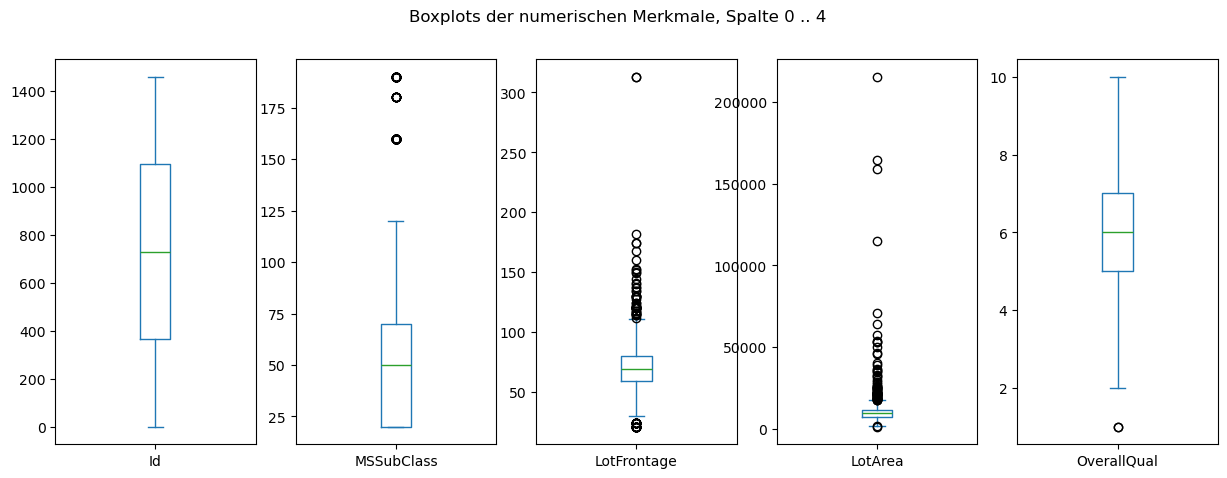

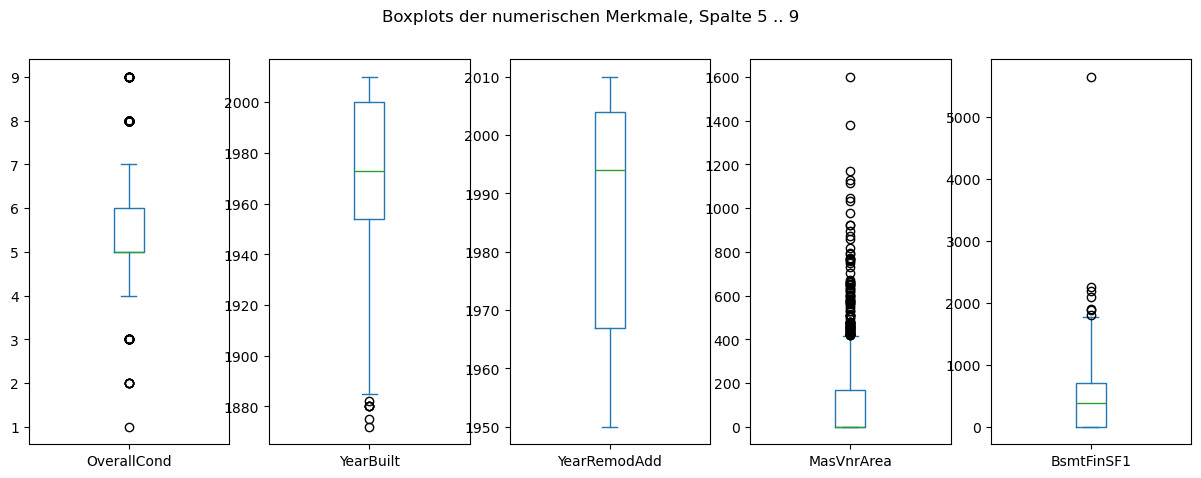

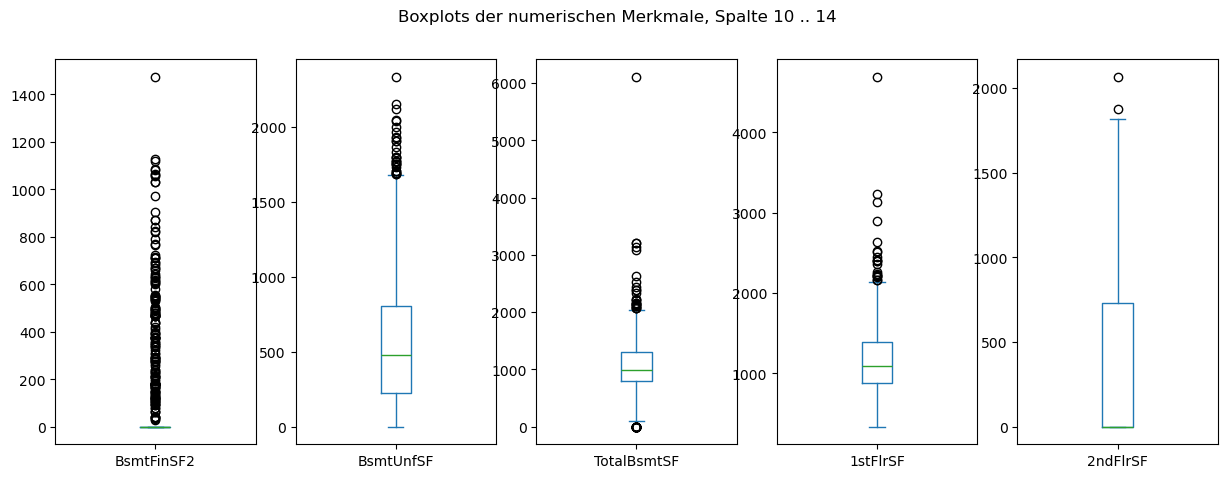

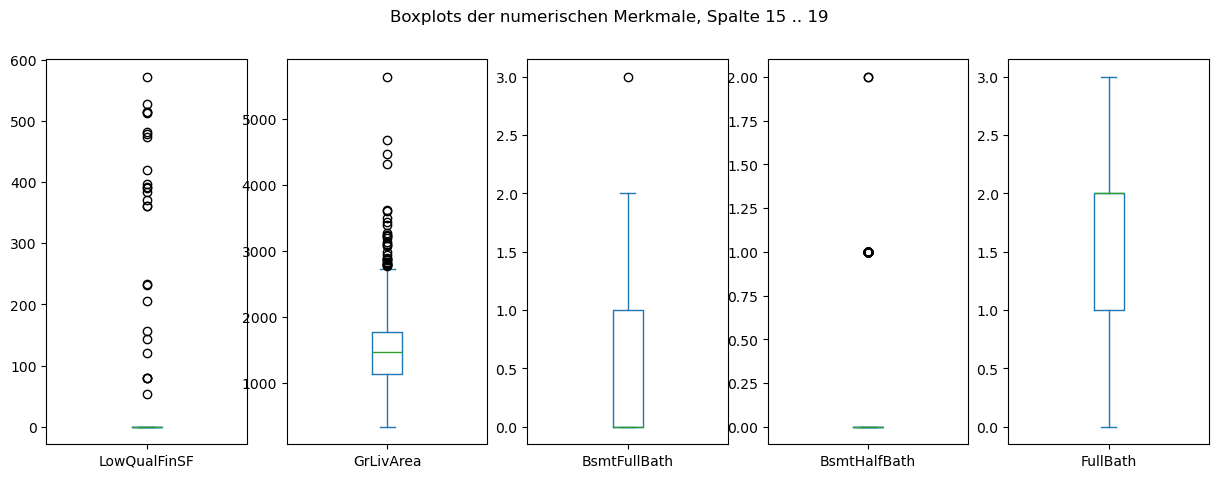

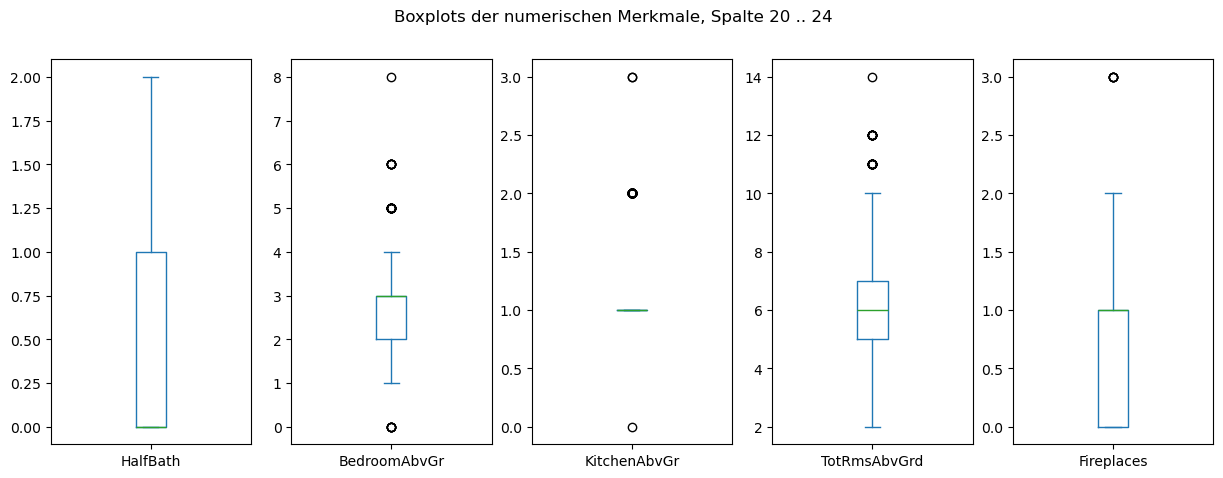

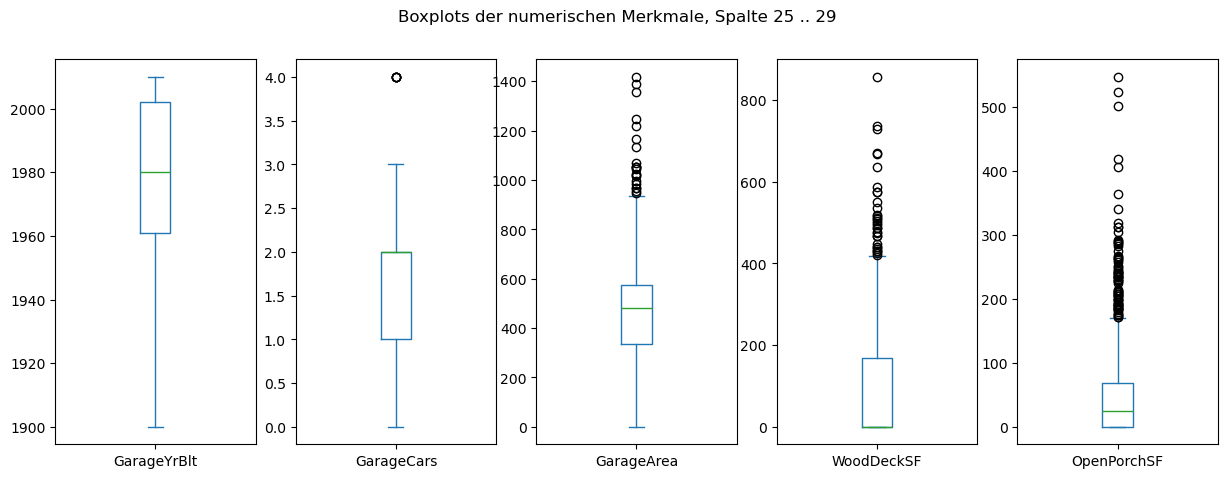

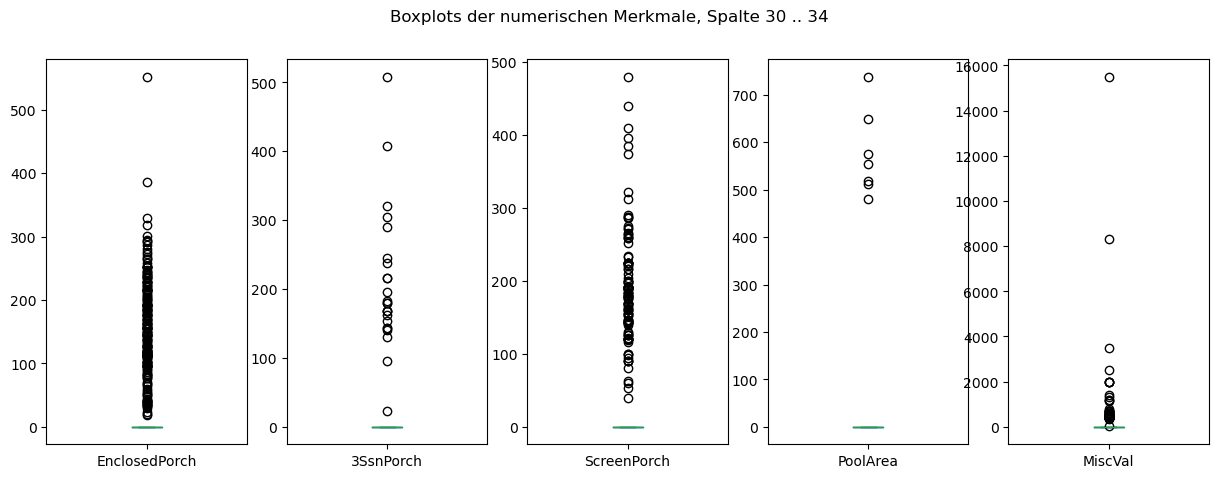

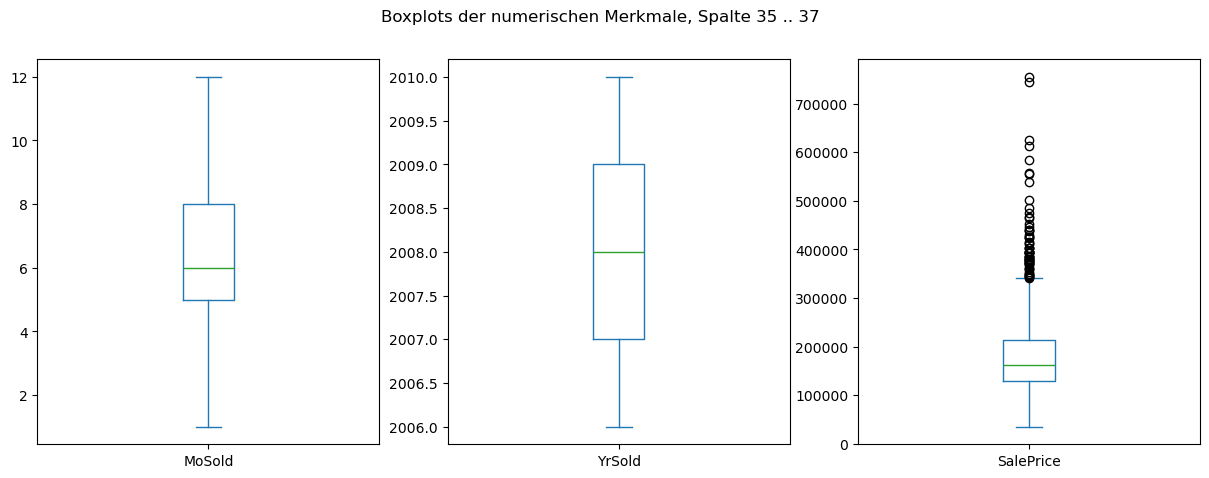

In [59]:
start = 0
anf = start
end = 0
while end < numerical_features.columns.size:
    end = anf + 5
    if end > numerical_features.columns.size:
        end = numerical_features.columns.size
    subset = numerical_features.iloc[:, anf:end]
    #print (min, max, subset.shape, subset.columns)
    subset.plot(kind="box",subplots=True,figsize=(15,5),title="Boxplots der numerischen Merkmale, Spalte " + str (anf) + " .. " + str (end -1));
    anf = end

#numerical_features.plot(kind="box",subplots=True,figsize=(150,25),title="Boxplots der numerischen Merkmale");
